In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_preprocess_data(filepath):
    """Load and preprocess the carbon emission dataset"""
    df = pd.read_csv(filepath)
    
    # Filter for relevant columns and rows with CO2 data
    co2_columns = ['country', 'year', 'population', 'co2', 'co2_per_capita', 
                   'coal_co2', 'oil_co2', 'gas_co2', 'cement_co2', 'flaring_co2']
    df = df[co2_columns]
    df = df[df['co2'].notna()]
    
    # Convert CO2 metrics to numeric
    for col in ['co2', 'co2_per_capita', 'coal_co2', 'oil_co2', 'gas_co2', 'cement_co2', 'flaring_co2']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    return df

def analyze_country_emissions(df, country_name):
    """Analyze emissions for a specific country"""
    country_data = df[df['country'] == country_name].copy()
    
    if country_data.empty:
        return None
    
    # Calculate metrics
    latest_year = country_data['year'].max()
    latest_data = country_data[country_data['year'] == latest_year].iloc[0]
    
    analysis = {
        'country': country_name,
        'latest_year': latest_year,
        'total_co2': latest_data['co2'],
        'co2_per_capita': latest_data['co2_per_capita'],
        'coal_share': latest_data['coal_co2'] / latest_data['co2'] * 100 if latest_data['co2'] > 0 else 0,
        'oil_share': latest_data['oil_co2'] / latest_data['co2'] * 100 if latest_data['co2'] > 0 else 0,
        'gas_share': latest_data['gas_co2'] / latest_data['co2'] * 100 if latest_data['co2'] > 0 else 0,
        'cement_share': latest_data['cement_co2'] / latest_data['co2'] * 100 if latest_data['co2'] > 0 else 0,
        'trend_5yr': calculate_trend(country_data, 'co2', 5),
        'trend_10yr': calculate_trend(country_data, 'co2', 10)
    }
    
    return analysis

def calculate_trend(df, metric, years):
    """Calculate trend over specified years"""
    if len(df) < 2:
        return "Insufficient data"
    
    latest_year = df['year'].max()
    past_year = latest_year - years
    
    if past_year < df['year'].min():
        return "Insufficient historical data"
    
    latest_value = df[df['year'] == latest_year][metric].values[0]
    past_value = df[df['year'] <= past_year].sort_values('year', ascending=False).iloc[0][metric]
    
    if past_value == 0:
        return "N/A (from zero)"
    
    change = ((latest_value - past_value) / past_value) * 100
    return f"{change:.1f}%"

def generate_feedback(analysis):
    """Generate feedback based on emission analysis"""
    if not analysis:
        return "No data available for this country."
    
    feedback = []
    feedback.append(f"Carbon Emission Report for {analysis['country']} ({analysis['latest_year']})")
    feedback.append("="*50)
    
    # Total emissions
    feedback.append(f"\nTotal CO2 Emissions: {analysis['total_co2']:.2f} million tons")
    
    # Per capita emissions
    global_avg_per_capita = 4.7  # Approximate global average
    if analysis['co2_per_capita'] < global_avg_per_capita:
        feedback.append(f"Per capita emissions: {analysis['co2_per_capita']:.2f} tons (below global average)")
    else:
        feedback.append(f"Per capita emissions: {analysis['co2_per_capita']:.2f} tons (above global average)")
    
    # Emission sources
    feedback.append("\nEmission Sources:")
    feedback.append(f"- Coal: {analysis['coal_share']:.1f}%")
    feedback.append(f"- Oil: {analysis['oil_share']:.1f}%")
    feedback.append(f"- Gas: {analysis['gas_share']:.1f}%")
    feedback.append(f"- Cement: {analysis['cement_share']:.1f}%")
    
    # Trends
    feedback.append("\nEmission Trends:")
    feedback.append(f"- 5-year change: {analysis['trend_5yr']}")
    feedback.append(f"- 10-year change: {analysis['trend_10yr']}")
    
    # Recommendations
    feedback.append("\nRecommendations:")
    if analysis['total_co2'] > 100:  # Only give recommendations for significant emitters
        if analysis['coal_share'] > 30:
            feedback.append("- Consider transitioning from coal to cleaner energy sources")
        if analysis['trend_5yr'].endswith('%') and float(analysis['trend_5yr'].replace('%', '')) > 5:
            feedback.append("- Implement policies to reduce emission growth rate")
        if analysis['co2_per_capita'] > global_avg_per_capita:
            feedback.append("- Promote energy efficiency and conservation programs")
    else:
        feedback.append("- Emissions are relatively low. Focus on maintaining sustainable development.")
    
    return "\n".join(feedback)

def visualize_emissions(df, country_name):
    """Create visualization of emission trends"""
    country_data = df[df['country'] == country_name]
    
    if len(country_data) < 2:
        print("Insufficient data for visualization")
        return
    
    plt.figure(figsize=(12, 6))
    
    # Plot total CO2 emissions
    plt.subplot(1, 2, 1)
    sns.lineplot(data=country_data, x='year', y='co2')
    plt.title(f'Total CO2 Emissions - {country_name}')
    plt.xlabel('Year')
    plt.ylabel('Million Tons CO2')
    
    # Plot per capita emissions
    plt.subplot(1, 2, 2)
    sns.lineplot(data=country_data, x='year', y='co2_per_capita')
    plt.title(f'Per Capita CO2 Emissions - {country_name}')
    plt.xlabel('Year')
    plt.ylabel('Tons CO2 per Person')
    
    plt.tight_layout()
    plt.show()

Data available for 247 countries

Enter a country name to analyze (or 'quit' to exit):
Data not available for . Try another country.

Enter a country name to analyze (or 'quit' to exit):

Carbon Emission Report for India (2023)

Total CO2 Emissions: 3062.32 million tons
Per capita emissions: 2.13 tons (below global average)

Emission Sources:
- Coal: 66.4%
- Oil: 23.4%
- Gas: 4.3%
- Cement: 5.8%

Emission Trends:
- 5-year change: 18.1%
- 10-year change: 53.5%

Recommendations:
- Consider transitioning from coal to cleaner energy sources
- Implement policies to reduce emission growth rate


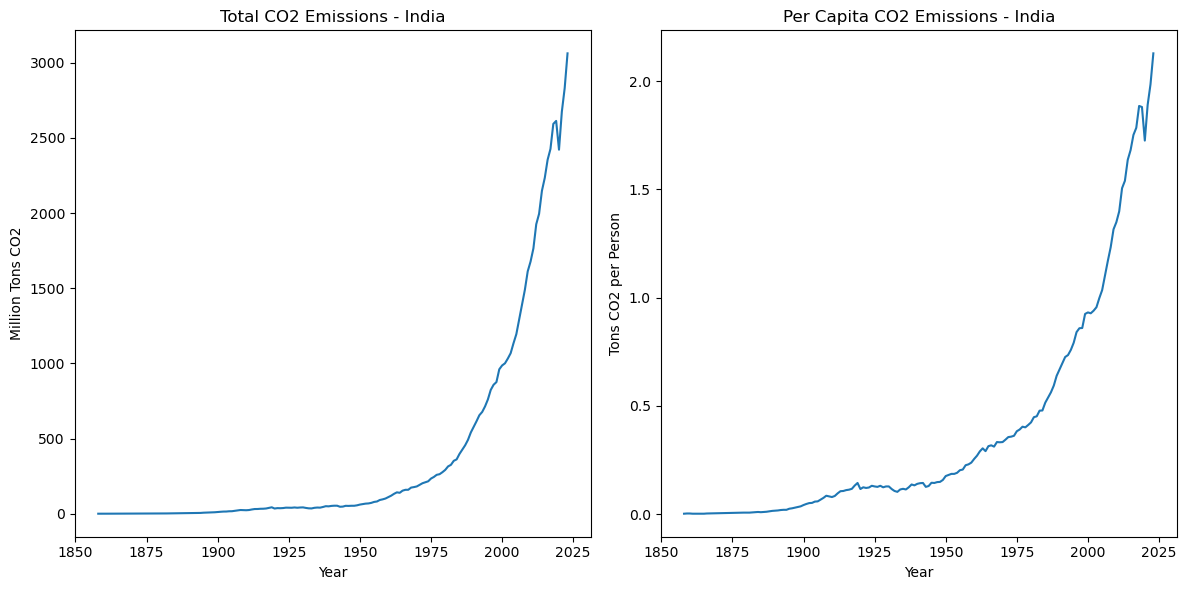


Enter a country name to analyze (or 'quit' to exit):


In [3]:

def main():
    # Load the data
    df = load_and_preprocess_data('dataset.csv')
    
    # Get unique countries
    countries = df['country'].unique()
    print(f"Data available for {len(countries)} countries")
    
    # Example usage
    while True:
        print("\nEnter a country name to analyze (or 'quit' to exit):")
        country_name = input().strip()
        
        if country_name.lower() == 'quit':
            break
            
        if country_name not in countries:
            print(f"Data not available for {country_name}. Try another country.")
            continue
            
        # Analyze and generate feedback
        analysis = analyze_country_emissions(df, country_name)
        feedback = generate_feedback(analysis)
        print("\n" + feedback)
        
        # Show visualization
        visualize_emissions(df, country_name)

if __name__ == "__main__":
    main()